# This AI model will be trained and tested against MNIST data set and will be
# able to classify handwritten digits.

In [105]:
import tensorflow as tf # framework for building the model

## Loading MNIST dataset - handwritten digits (0-9) with 28x28 size
## Tensorflow has it already and can be loaded using Keras.

In [106]:
mnist = tf.keras.datasets.mnist

# Unpacking and dividing the dataset into training and testing datasets
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [107]:
# MNIST data contains 60000 training samples and 10000 testing samples
print(len(xTrain))
print(len(yTrain))
print(len(xTest))
print(len(yTest))

# Shape of the image is 28x28
print(xTrain[0].shape)
print(xTrain[0])

60000
60000
10000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

## Importing matplotlib to plot and view the images

In [108]:
import matplotlib.pyplot as plt

### Visualising one sample image

5


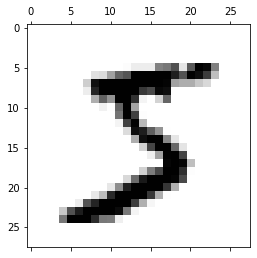

In [109]:
plt.matshow(xTrain[0])
print(yTrain[0])

# we don't know if it's colour image or binary image
# so, we shall change the configuration to simple binary
plt.imshow(xTrain[0], cmap=plt.cm.binary)

## To bring all the values in the data to the same range, we need to normalise/scale the images

## We converted the images to gray scale and the values of the pixels range from 0 to 255. (0 --> Black, 255 --> White)

## So inorder to scale it, we shall make the values ranging from 0 to 1 which can be done by dividing by 255

In [110]:
xTrain = xTrain / 255
xTest = xTest / 255

print(xTrain[0])
print(xTest[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing image to make it suitable for applying Convolution operations

In [111]:
import numpy as np # required for array and other mathematical operations

In [112]:
IMG_SIZE = 28
# increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
xTrainr = np.array(xTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
xTestr = np.array(xTest).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training samples:", xTrainr.shape)
print("Testing samples:", xTestr.shape)

Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


## Creating the Deep Neural Netwrok and training on 60000 samples

In [113]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten, Conv2D

In [114]:
# Creating a simple neural network
model = Sequential() # Sequential allows to build a model layer by layer

# First Convolutional Layer (from 28^2 to 26^2)
# first convolution layer (input layer size is mentioned for only first layer)
model.add(Conv2D(64, (3, 3), input_shape = xTrainr.shape[1: ]))
# activation function to make it non-linear
model.add(Activation("relu"))
# maxpooling single maximum value of 2x2
model.add(MaxPooling2D(pool_size=(2, 2))) # selects the maximum element from
                                          # each region of the feature map
                                          # reducing the size by half

# Second Convolutional Layer (from 26^2 to 24^2)
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer (from 24^2 to 22^2)
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we shall flatten (transfroming into a single column) the feature map
# matrix before connecting the layers fully
model.add(Flatten())

# Creating the dense layer (fully connecting the each layer to the next layer)
model.add(Dense(64)) # connecting first layer
model.add(Activation("relu"))

model.add(Dense(32)) # connecting layer 2
model.add(Activation("relu"))

# Last fully connected layer, where the output must be equal to number
# classes, 10, that is (0 to 9)
model.add(Dense(10))
model.add(Activation("softmax")) # class probabilities

# Displaying the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

## Compiling our AI model

In [115]:
model.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimate the loss of the model
    metrics=['accuracy']
)

## Training the model with the training dataset

In [116]:
model.fit(xTrainr, yTrain, epochs=2, validation_split=0.3)

Epoch 1/2
1313/1313 [==============================] - 32s 24ms/step - loss: 0.2848 - accuracy: 0.9119 - val_loss: 0.1166 - val_accuracy: 0.9659
Epoch 2/2
1313/1313 [==============================] - 35s 26ms/step - loss: 0.0926 - accuracy: 0.9714 - val_loss: 0.0768 - val_accuracy: 0.9763


## Evaluation of the model on the basis of the test data set

In [117]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 2s 7ms/step - loss: 0.0732 - accuracy: 0.9772


[0.07318329811096191, 0.9771999716758728]

## The model making predictions

In [122]:
yPredicted = model.predict([xTestr]) # the prediction array of all the samples
print(yPredicted)

[[6.2493797e-07 2.7460715e-06 1.1869683e-04 ... 9.9963248e-01
  8.1038003e-08 5.2448718e-06]
 [2.9897431e-04 5.9140543e-04 9.9883467e-01 ... 1.6652474e-06
  1.8180617e-04 1.3610580e-09]
 [2.0591660e-05 9.9989915e-01 5.5347705e-06 ... 5.5477763e-06
  4.1175917e-05 1.0002820e-05]
 ...
 [5.6402030e-09 1.1952581e-06 1.1667050e-08 ... 1.5751843e-05
  1.4718945e-04 6.5041328e-04]
 [1.0865934e-05 7.1024090e-08 2.1046952e-07 ... 4.9114396e-06
  9.6153165e-04 2.2495026e-04]
 [3.9004590e-06 2.4346818e-08 9.2804521e-07 ... 3.1129545e-08
  3.8722563e-05 1.9587450e-08]]


[9.9995017e-01 2.3812279e-06 3.8261223e-06 1.7053511e-06 3.4824528e-09
 3.0578108e-06 2.6064667e-05 6.7667906e-06 4.1300468e-06 1.8881287e-06]
0
Correct Prediction!


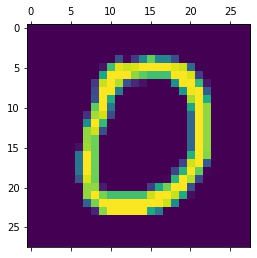

In [129]:
# Checking if the predictions are true
i = 10
plt.matshow(xTestr[i]) # the original test sample
print(yPredicted[i]) # the model's prediction array for that sample
print(np.argmax(yPredicted[i])) # returning the maximum value's index

if np.argmax(yPredicted[i]) == yTest[i]:
    print("Correct Prediction!")
else:
    print("Incorrect Prediction!!!")

## Creating a confusion matrix for this model

In [130]:
yPredictedLabels = [np.argmax(i) for i in yPredicted]
print(yPredictedLabels[: 6])
print(yTest[: 6])

[7, 2, 1, 0, 4, 1]
[7 2 1 0 4 1]


In [132]:
confMatx = tf.math.confusion_matrix(labels=yTest, predictions=yPredictedLabels)
print(confMatx)

tf.Tensor(
[[ 956    1    2    0    1    3    7    4    2    4]
 [   0 1125    0    3    0    1    2    1    3    0]
 [   3    1  996    7    0    0    4   17    3    1]
 [   0    0    0  989    0    4    0   12    2    3]
 [   1    0    0    0  935    0   13    2    1   30]
 [   1    0    1    5    0  876    3    1    1    4]
 [   1    2    0    0    1    5  949    0    0    0]
 [   0    3   15    1    0    1    0  998    2    8]
 [   1    1    1    1    2    6    1    1  951    9]
 [   1    0    0    0    1    1    1    3    5  997]], shape=(10, 10), dtype=int32)


## Visualising the confusion matrix using seaborn library

Text(69.0, 0.5, 'True Value')

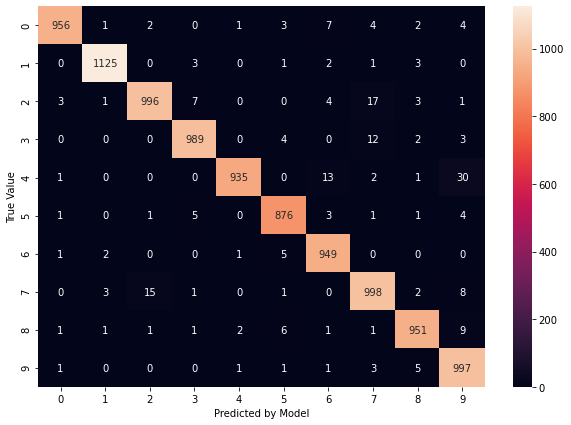

In [133]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d')
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")